In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False) 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ensure the TransactionMonth is in datetime format
#df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m')
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [5]:
# Group by geography (e.g., Country and Province) to get trends in cover type, premium, and auto make
geo_group = df.groupby(['Country', 'Province'])

<Figure size 1200x1000 with 0 Axes>

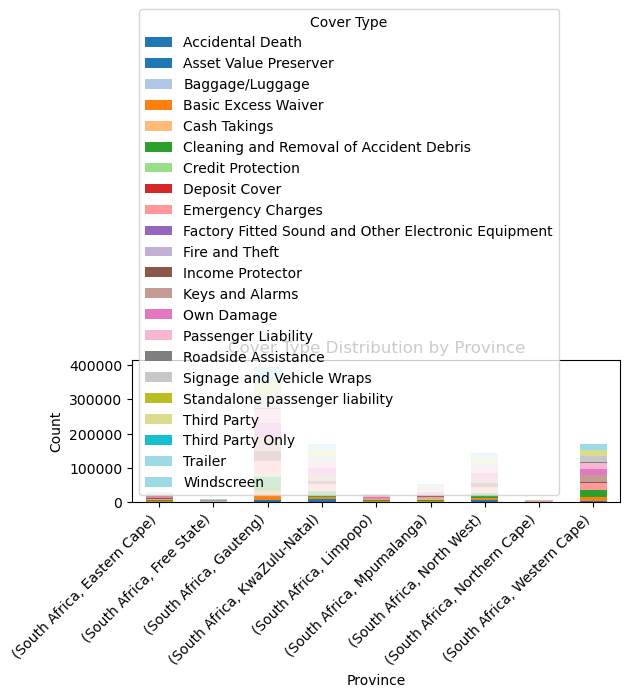

In [10]:
# 1. Compare Cover Type distribution by Province
cover_type_by_province = geo_group['CoverType'].value_counts().unstack().fillna(0)

# Plot Cover Type Distribution by Province
plt.figure(figsize=(12, 10))  # Increase the size of the figure
cover_type_by_province.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Cover Type Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Cover Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

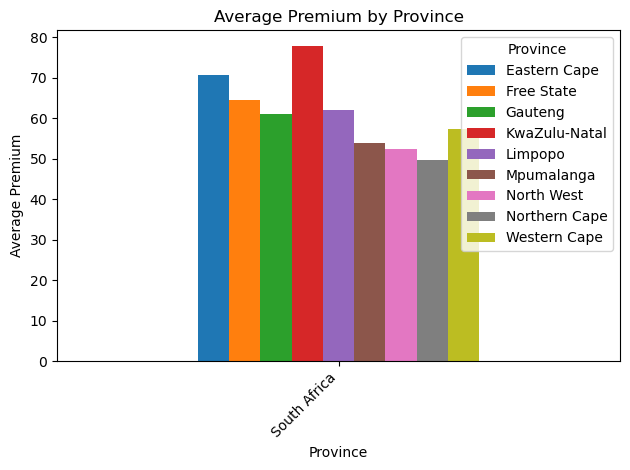

In [12]:
# 2. Average Premium by Province
premium_by_province = geo_group['TotalPremium'].mean().unstack()

# Plot Average Premium by Province
plt.figure(figsize=(10, 6))
premium_by_province.plot(kind='bar')
plt.title('Average Premium by Province')
plt.xlabel('Province')
plt.ylabel('Average Premium')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_27580\2736480072.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

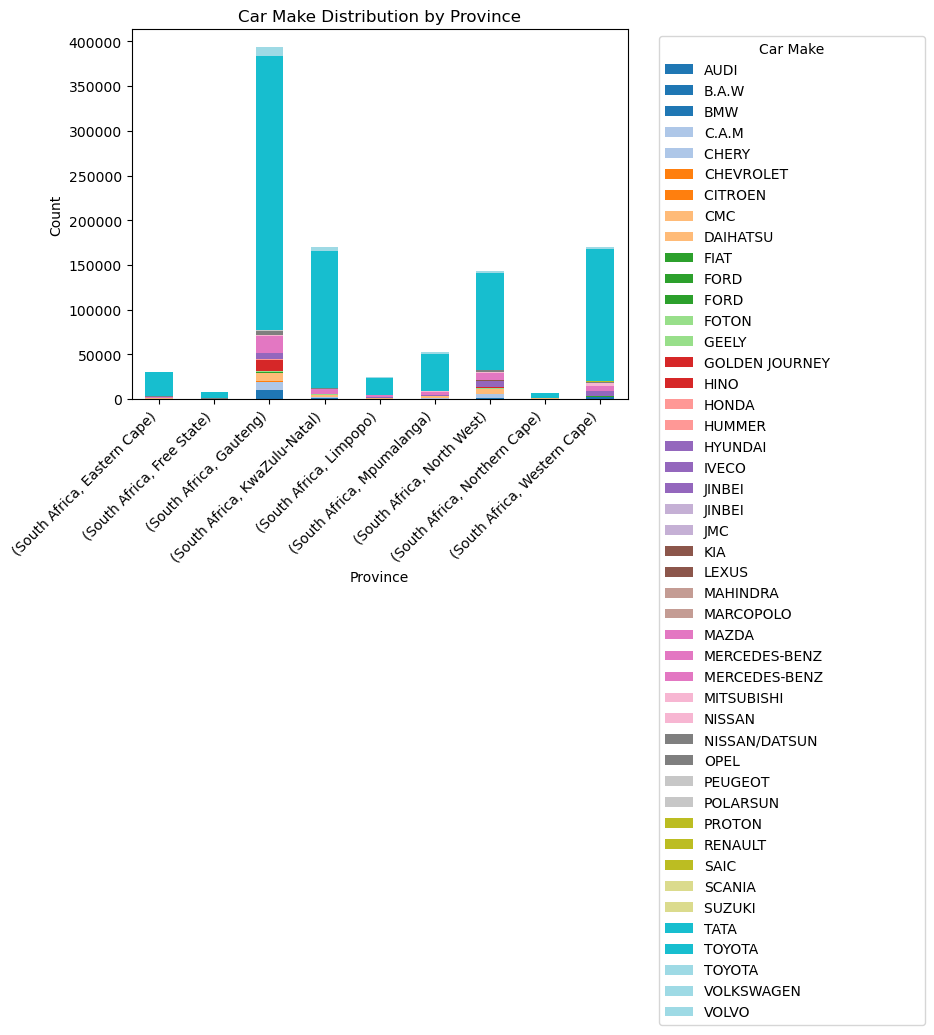

In [15]:
# 3. Car Make distribution across different provinces
car_make_by_province = geo_group['make'].value_counts().unstack().fillna(0)

# Plot Car Make Distribution by Province
plt.figure(figsize=(10, 6))
car_make_by_province.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Car Make Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

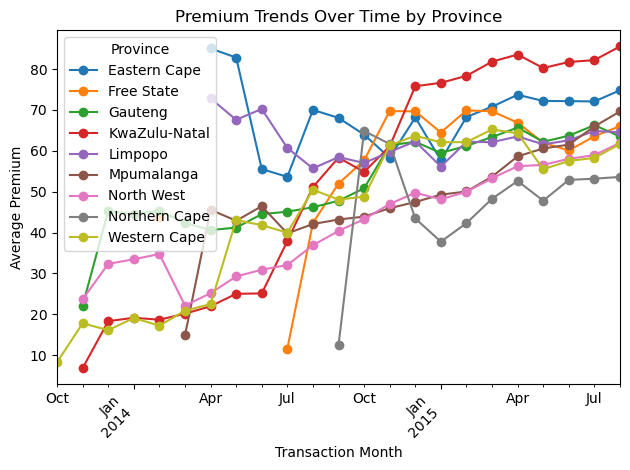

In [16]:
# 4. Premium trends over time
premium_trends = df.groupby(['TransactionMonth', 'Province'])['TotalPremium'].mean().unstack()

# Plot premium trends over time by Province
plt.figure(figsize=(10, 6))
premium_trends.plot(kind='line', marker='o')
plt.title('Premium Trends Over Time by Province')
plt.xlabel('Transaction Month')
plt.ylabel('Average Premium')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


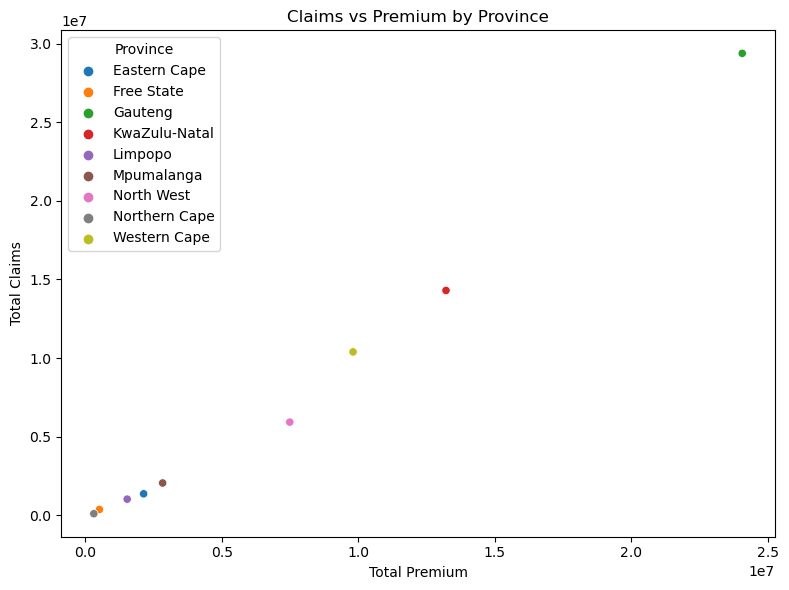

In [17]:
# 5. Claims vs Premium by Province
claims_vs_premium = geo_group[['TotalClaims', 'TotalPremium']].sum()

# Scatter plot for Claims vs Premium by Province
plt.figure(figsize=(8, 6))
sns.scatterplot(data=claims_vs_premium, x='TotalPremium', y='TotalClaims', hue=claims_vs_premium.index.get_level_values('Province'))
plt.title('Claims vs Premium by Province')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Province')
plt.tight_layout()
plt.show()